# Data enginieering - clustering

## Exercise 1: k-means on digits

Use K-means clustering on the MNIST dataset (which can be imported with `from sklearn.datasets import load_digits`) to learn to identify the 10 digits in an unsupervised manner.

1. Plot the `cluster_centers_` (which should be shape `(10,64)`) onto a `8x8` grid (hint: use `kmeans.cluster_centers_.reshape`)
2. Reorganize the clusters so that each of your learned clusters labels overlap with the true label (eg. if the digit 4 has the cluster label 9, you want to remap it to 4). Hint: You can use the statistical mode of your clusters and the real label to match them
3. Now that your cluster labels are matched to the supervised learning labels, check the classification accuracy of your clustering model (accuracy score and confusion matrix). Give a two paragraph interpretation.
4. Use the Fowlkes-Mallows score to evaluate your clustering against the true labels. Give a two paragraph interpretation comparing to your result in #3.

In [ ]:
# 1. Plot the cluster_centers_ (which should be shape (10,64)) onto a 8x8 grid 
# (hint: use kmeans.cluster_centers_.reshape)

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin

from sklearn.preprocessing import StandardScaler


digit, target = load_digits(return_X_y=True)

#print(digits.data.shape) #(1797, 64)
#print(digits.images[0])  # 8 x 8 array : 64 values of color code

# We only want 10 rows of [0-9] coded digits: shape should be(10,64)

#x = digit.data
x = load_digits().data
x.shape





(1797, 64)

In [2]:
# Kmean : Linear clustering. Seems not appropriated for digit recognition

N_CLUSTERS =10

kmeans = KMeans(n_clusters=N_CLUSTERS)
Km = kmeans.fit(x)
labels = kmeans.predict(x) # Get the Labels

# plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_.reshape(10,8,8)


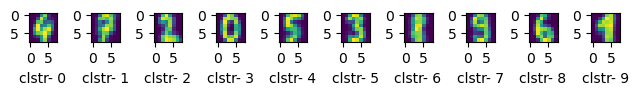

In [3]:

# It seems the label of a cluster, is the actual position of a center,
# in the indexed list of centers
# let's plot the corresponding image of each center vs its position in the list of 10 centers: 

fig, ax = plt.subplots(1,10) #(2,5)
for a,i_center in zip(ax.flat,enumerate(centers)):  # ax.flat: 2*5 => 10
    a.imshow(i_center[1]) # imshow : convert tabular data into image
    a.set_xlabel("clstr- %d" % i_center[0])
plt.tight_layout()
 



In [ ]:
# 2. Reorganize the clusters so that each of your learned clusters labels overlap with the true label 
#(eg. if the digit 4 has the cluster label 9, you want to remap it to 4). 
#Hint: You can use the statistical mode of your clusters and the real label to match them



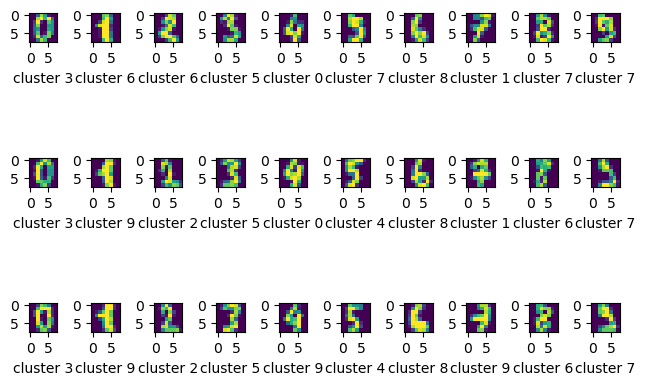

In [4]:
# Let's verify this assumption on how the labelling is done,
# taking the 1st 30 samples from the dataset
# and observe what the model predicted depending on the input.
# i.e We visualize the image vs the attributed Cluster number.

# then (expected a few recall / precision error), we will be able to confirm our assumption
# that a cluster label is its actual position in the array of the given size 10 clusters
fig1, ax1 = plt.subplots(3,10)
x1 = x[:30]
for a,row_image in zip(ax1.flat,enumerate(x1.reshape(30,8,8))): 
    #row_image: [0]: row number in the dataset
    #row_image: [1]: image data 8*8 at specified row, in the dataset
    
    a.imshow(row_image[1])  # checking the image for specified row
    a.set_xlabel("cluster %d" % labels[row_image[0]]) # Checking what the labels output was for specified row number
plt.tight_layout()


# Yes we can confirm in the 1st 30 samples, at least 2/3 labels, match our labelling assumption
# CCL: Label name of a center is its acutal index position in the array of centers size 10

In [ ]:
# Now that we understand how a label name is given to a center,
# we can reposition each center in the centers list, so that a center <=> label
# Note: a center represent an actual image digit

# What we want to have correct label vs digit represented in the image:
# disered Label.  |   POSITION in centers array
#    0           <=>  0
#    1           <=>  1
#    2           <=>  2
#    3           <=>  3
#    4           <=>  4
#    5           <=>  5
#    6           <=>  6
#    7           <=>  7
#    8           <=>  8
#    9           <=>  9

# What we currently have by visual inspection:
#  Observed center Image |  Label / POSITION in centers array
#    0                <=>  3
#    1                <=>  9
#    2                <=>  2
#    3                <=>  5
#    4                <=>  0
#    5                <=>  4
#    6                <=>  8
#    7                <=>  1
#    8                <=>  6
#    9                <=>  7

In [ ]:
# --------- NOT WORKING -----------#
'''centers = centers.reshape(10,64)
centers.shape'''

In [ ]:
# --------- NOT WORKING -----------#
'''
kmeans.cluster_centers_[0] = centers[5]
kmeans.cluster_centers_[1] = centers[2]
kmeans.cluster_centers_[2] = centers[9]
kmeans.cluster_centers_[3] = centers[6]
kmeans.cluster_centers_[4] = centers[8]
kmeans.cluster_centers_[5] = centers[1]
kmeans.cluster_centers_[6] = centers[0]
kmeans.cluster_centers_[7] = centers[7]
kmeans.cluster_centers_[8] = centers[3]
kmeans.cluster_centers_[9] = centers[4]
'''


In [ ]:

'''centers = kmeans.cluster_centers_'''

In [ ]:
# --------- NOT WORKING -----------#
# we tried to realocate the content of the kmeans.cluster_centers_
# but that doesn't work.
# each time the predict method is launched,
# the kmeans.cluster_centers_ is reupdated

In [ ]:
# --------- NOT WORKING -----------#

"""updated_labels = kmeans.predict(x)"""

In [ ]:
# --------- NOT WORKING -----------#
# Let's check the Centers labels is correct
"""fig, ax2 = plt.subplots(1,10) #(2,5)
for a,i_center in zip(ax2.flat,enumerate(centers.reshape(10,8,8))):  # ax.flat: 2*5 => 10
    a.imshow(i_center[1]) # imshow : convert tabular data into image
    a.set_xlabel("clstr- %d" % i_center[0])
plt.tight_layout()"""

In [ ]:
# --------- NOT WORKING -----------#
# Let's check the labelling done on the dataset
"""fig1, ax3 = plt.subplots(3,10)
x2 = x[:30]
for a,row_image in zip(ax3.flat,enumerate(x2.reshape(30,8,8))): 
    #row_image: [0]: row number in the dataset
    #row_image: [1]: image data 8*8 at specified row, in the dataset
    
    a.imshow(row_image[1])  # checking the image for specified row
    a.set_xlabel("cluster %d" % labels[row_image[0]]) # Checking what the labels output was for specified row number
plt.tight_layout()"""

In [15]:
# Let's simply convert the table results using a dictionary, into an updated label list

#    0                <=>  3
#    1                <=>  9
#    2                <=>  2
#    3                <=>  5
#    4                <=>  0
#    5                <=>  4
#    6                <=>  8
#    7                <=>  1
#    8                <=>  6
#    9                <=>  7

convert_dic = {}
convert_dic[0] = 4
convert_dic[1] = 7
convert_dic[2] = 2
convert_dic[3] = 0
convert_dic[4] = 5
convert_dic[5] = 3
convert_dic[6] = 8
convert_dic[7] = 9
convert_dic[8] = 6
convert_dic[9] = 1

def conversion(label):
    return convert_dic[label]

In [20]:
labels



array([3, 6, 6, ..., 6, 7, 7], dtype=int32)

In [19]:
updated_labels_ = np.zeros_like(labels)
for i in range(0,N_CLUSTERS):
    updated_labels = list(map(conversion, labels ))
    
updated_labels = np.array(updated_labels)
updated_labels

array([0, 8, 8, ..., 8, 9, 9])

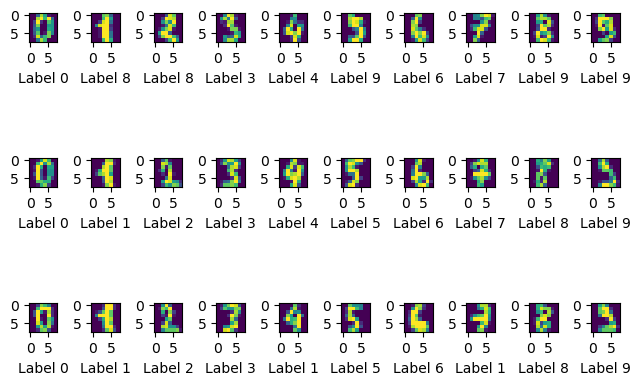

In [34]:
# Let's verify the output :
fig4, ax4 = plt.subplots(3,10)
x4 = x[:30]
for a,row_image in zip(ax4.flat,enumerate(x4.reshape(30,8,8))): 
    #row_image: [0]: row number in the dataset
    #row_image: [1]: image data 8*8 at specified row, in the dataset
    
    a.imshow(row_image[1])  # checking the image for specified row
    a.set_xlabel("Label %d" % updated_labels[row_image[0]]) # Checking what the labels output was for specified row number
plt.tight_layout()



In [ ]:
# 3. Now that your cluster labels are matched to the supervised learning labels, 
# check the classification accuracy of your clustering model (accuracy score and confusion matrix). 
# Give a two paragraph interpretation.
# Use the Fowlkes-Mallows score to evaluate your clustering against the true labels. 
# Give a two paragraph interpretation comparing to your result in #3.

In [33]:
from sklearn.metrics import classification_report
print(classification_report(target,updated_labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.60      0.30      0.40       182
           2       0.84      0.83      0.84       177
           3       0.87      0.84      0.86       183
           4       0.98      0.90      0.94       181
           5       0.93      0.75      0.83       182
           6       0.97      0.98      0.98       181
           7       0.83      0.98      0.90       179
           8       0.45      0.57      0.51       174
           9       0.56      0.78      0.65       180

    accuracy                           0.79      1797
   macro avg       0.80      0.79      0.79      1797
weighted avg       0.80      0.79      0.79      1797



In [31]:

from sklearn.metrics import confusion_matrix

print(confusion_matrix(target,updated_labels))

[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 147  13   0   0   0   4   8   2]
 [  0   0   0 154   0   2   0   7   7  13]
 [  0   7   0   0 162   0   0  10   2   0]
 [  0   0   0   1   2 136   1   0   0  42]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   2   0   0   0   0   0 175   2   0]
 [  0   5   3   2   0   4   2   5 100  53]
 [  0  20   0   6   0   4   0   9   0 141]]


In [ ]:
#3.- Confusion Matrix INTERPRETATION

           PREDICTED
       \    0    1   2   3   4   5   6   7   8   9
ACTUALS 0 [177   0   0   0   1   0   0   0   0   0]
        1 [  0  55  24   1   0   1   2   0  99   0]
        2 [  1   2 147  13   0   0   0   4   8   2]
        3 [  0   0   0 154   0   2   0   7   7  13]
        4 [  0   7   0   0 162   0   0  10   2   0]
        5 [  0   0   0   1   2 136   1   0   0  42]
        6 [  1   1   0   0   0   0 177   0   2   0]
        7 [  0   2   0   0   0   0   0 175   2   0]
        8 [  0   5   3   2   0   4   2   5 100  53]
        9 [  0  20   0   6   0   4   0   9   0 141]


* The diagonal indicates all the cases number that are matching a correct Actuals / Predictions

* From the rows we can extract the Precision

* From the Columns we can extract the Recall
           
           \ ( Rows)
  (columns) \ precision   --- Fp
      recall \
         |
         |
        Fn
* f1-score EVALUATION CRITERIA: 
             1 : Very good
     [0.8-0.9] : Good
    [0.5 - 0.8]: OK
         < 0.5 : Not good

* Accuracy EVALUATION CRITERIA:
        >90% : probably Overfit
    [70% - 90%]: Realistic
         <70%: Not so good
    
                
# FORMULAS: 
# Accuracy = ( TP + TN)/(TP+TN+FP+FN) =
# P = Precision = Tp / (Tp+Fp)
# R = Recall = Tp/(Tp+Fn)
# F1_Score = 2(P*R) / (P+R) 

EX for class 0 :
    1) ROW _0 : 177   0   0   0   1   0   0   0   0   0 
    2) Precision_0 = 177 / (177 + 1) = 0.99 Good Result

    3) COLUMN_0:
        177
        0 
        1 
        0 
        0 
        0 
        1 
        0 
        0  
        0
    4) Recall_0 = 177/(177 + 1+1)= 0.98 GOOD Result

    5) F1_Score_class_0 = 2(P*R) / (P+R) = 2* (0.99 * 0.98) / (0.99 + 0.98) = 0.99 GOOD Result
    
    


In [ ]:
               precision    recall  f1-score   Based on above evaluation criteria

           0       0.99      0.99      0.99       Class_0: VERY GOOD Result
           1       0.60      0.30      0.40       Class_1: BAD Result
           2       0.84      0.83      0.84       Class_2: GOOD result
           3       0.87      0.84      0.86       Class_3: GOOD result
           4       0.98      0.90      0.94       Class_4: VERY Good Result
           5       0.93      0.75      0.83       Class_5: GOOD result
           6       0.97      0.98      0.98       Class_6: VERY GOOD result
           7       0.83      0.98      0.90       Class_7: VERY GOOD result
           8       0.45      0.57      0.51       Class_8: BAD result
           9       0.56      0.78      0.65       Class_9: BAD result

    accuracy                           0.79       Overall Accuracy: GOOD
 
The precision, recall , f1-score is good overall
The Accuracy is 0.79 which is GOOD.

We can notice BAD results in precision and recall for 3 specific digits:
    - 1
    - 8
    - 9
This must be due to the resolution of the image 8*8.
We should try with an increase resolution to see if the precision on these digits increases.


In [36]:
# 4. Use the Fowlkes-Mallows score to evaluate your clustering against the true labels. Give a two paragraph interpretation comparing to your result in #3.

In [35]:
from sklearn.metrics.cluster import fowlkes_mallows_score
fowlkes_mallows_score(target, updated_labels)

# The Fowlkes-Mallows Score is an evaluation metric to evaluate the similarity among clusterings
# The Fowlkes-Mallows index (FMI) is defined as the geometric mean between of the precision and recall:
# FMI = TP / sqrt((TP + FP) * (TP + FN))

# 1: VERY GOOD result
# 0: BAD RESULT

0.7005088849436739

In [ ]:
#4.- INTERPRETATION
The result is 0.7 : GOOD
This means also means the the quantity of Fp and Fn are still elevated
If the 3 clusters on digits 1, 8, 9 were performing better, the Fowlkes-Mallows score would improve.

We should try this exercise with a better image resolution.







## Exercise 2: Clustering on Colleges

This question will use the data from `college.csv`

1. Use clustering with `k=2` on all data except whether the college is private of not. Try to match it best to the private/public college split (hint: don't forget to normalize your features!). Evaluate it in terms of classification metrics and clustering metrics.

2. Knowing what you found in `2.1`, find the best overall clustering with the k of your choice. Make an argument and a visualization of the clusters (with two relevant statistics) to demonstrate why you think your clustering is good.

In [1]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    recall_score,
)
import pandas as pd
# exercise 2


df = pd.read_csv('../data/college.csv')
df.columns
#df.info()
df

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [2]:
df = df.rename(columns={'Unnamed: 0':'University'})
df['University'] = df['University'].convert_dtypes(convert_string=True)
df['Private'] = df['Private'].convert_dtypes(convert_boolean=True)

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   University   777 non-null    string 
 1   Private      777 non-null    string 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [3]:
private_bool = {}
private_bool.update({'Yes':1, 'No':0})
df['Private'] = [int(private_bool[val]) for val in df['Private']]

In [4]:
df

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,0,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,1,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,1,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,1,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [5]:
df_filter = df.drop(['Private','University'], axis=1)
df_filter.columns


Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [9]:
# clustering : Private / Public 

k = 2

kmeans = KMeans(n_clusters=k)
Km = kmeans.fit(df_filter)
private_Publ_labels = kmeans.predict(df_filter) # Get the Labels

clusters_public_private = kmeans.cluster_centers_
clusters_public_private.shape

(2, 17)

In [10]:
private_Publ_labels.shape

(777,)

In [11]:
def get_classification(labels_true, labels_pred):
    classifications = [classification_report, f1_score,recall_score]
    title_classifications = ['\n1- report', '2- f1_score', '3- recall']
    for score in enumerate(classifications):
        print(title_classifications[score[0]])
        print(score[1](labels_true, labels_pred))

In [12]:
get_classification(df['Private'],private_Publ_labels)


1- report
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777

2- f1_score
0.8606158833063209
3- recall
0.9398230088495575


In [13]:
# Let's check how many True private school vs Public schools
df['Private'].value_counts()


1    565
0    212
Name: Private, dtype: int64

In [14]:
total_private_schools = 565
total_public_schools = 212

In [15]:
# The f1-score is rather low on the 0 cluster ( public schools).
# Let's harmonize the scale of each feature : standardization

In [16]:
# Let's confirm what the 0, 1 centroids correspond to:
check_meaning = np.column_stack((df['Private'],private_Publ_labels))
check_meaning = pd.DataFrame(check_meaning)
check_meaning.rename({0:'Private_DF', 1:'Private_clusterization'},axis=1)

# It seems the Cluster 1 means Private / Cluster 0 means Public
# no need to parse the labels output

,Private_DF,Private_clusterization
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
772,0,1
773,1,1
774,1,1
775,1,0


In [17]:
np.max(df_filter)

/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


Apps           48094.0
Accept         26330.0
Enroll          6392.0
Top10perc         96.0
Top25perc        100.0
F.Undergrad    31643.0
P.Undergrad    21836.0
Outstate       21700.0
Room.Board      8124.0
Books           2340.0
Personal        6800.0
PhD              103.0
Terminal         100.0
S.F.Ratio         39.8
perc.alumni       64.0
Expend         56233.0
Grad.Rate        118.0
dtype: float64

In [18]:
np.min(df_filter)

/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


Apps             81.0
Accept           72.0
Enroll           35.0
Top10perc         1.0
Top25perc         9.0
F.Undergrad     139.0
P.Undergrad       1.0
Outstate       2340.0
Room.Board     1780.0
Books            96.0
Personal        250.0
PhD               8.0
Terminal         24.0
S.F.Ratio         2.5
perc.alumni       0.0
Expend         3186.0
Grad.Rate        10.0
dtype: float64

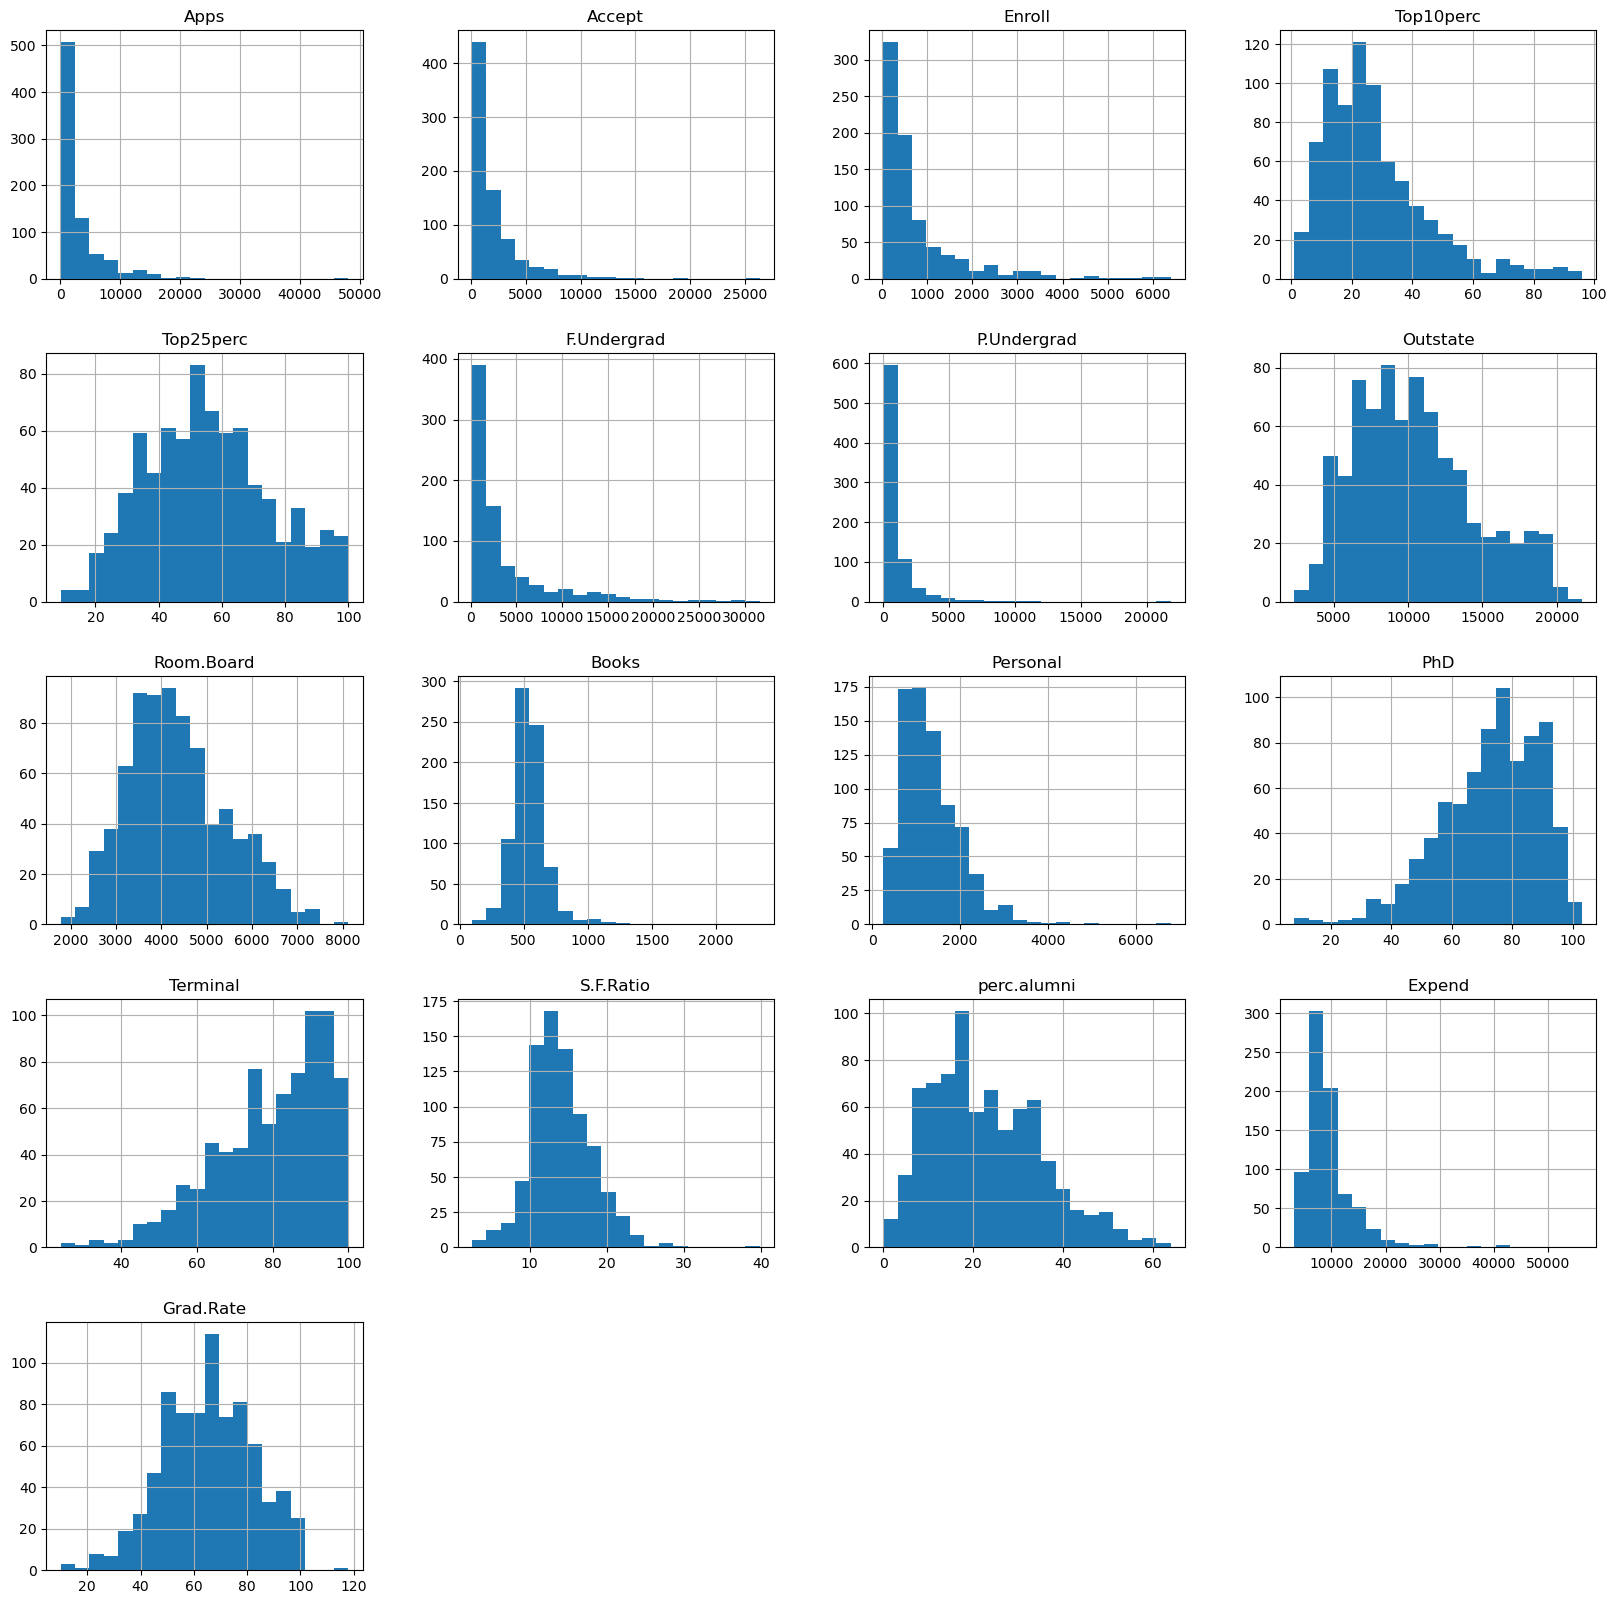

In [19]:
df_filter.hist(figsize=(20, 20), bins=20);

In [20]:
# We can really see the scale on x-axis is very different between features

In [21]:
from sklearn.preprocessing import StandardScaler


# normalize dataset for easier parameter selection


df_filter_normalized = StandardScaler().fit_transform(df_filter)
df_filter_normalized = pd.DataFrame(df_filter_normalized)
df_filter_normalized.columns = df_filter.columns
df_filter_normalized

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,-0.208040,-0.205673,-0.255200,-1.336352,-1.505488,-0.126030,0.771435,-0.906289,-0.417455,-0.299280,-0.207855,-0.775861,-1.339146,1.746877,-0.706073,-0.994781,-1.483301
773,-0.269575,-0.087284,-0.091509,-0.201858,-0.444454,-0.175543,0.165435,0.268462,0.549707,0.306784,-0.133960,0.020822,-0.319632,-0.199632,0.666685,-0.090290,1.021555
774,-0.233895,-0.042377,-0.091509,0.365389,0.262901,-0.187095,-0.453053,-0.880670,-0.143730,0.409815,-0.827095,-0.346878,-0.319632,0.078441,-0.221570,-0.256241,-0.959029
775,1.991711,0.177256,0.578333,3.825595,2.182866,0.312977,-0.507606,2.337894,1.963953,0.488603,1.144424,1.430339,1.107689,-2.095582,2.120194,5.887971,1.953595


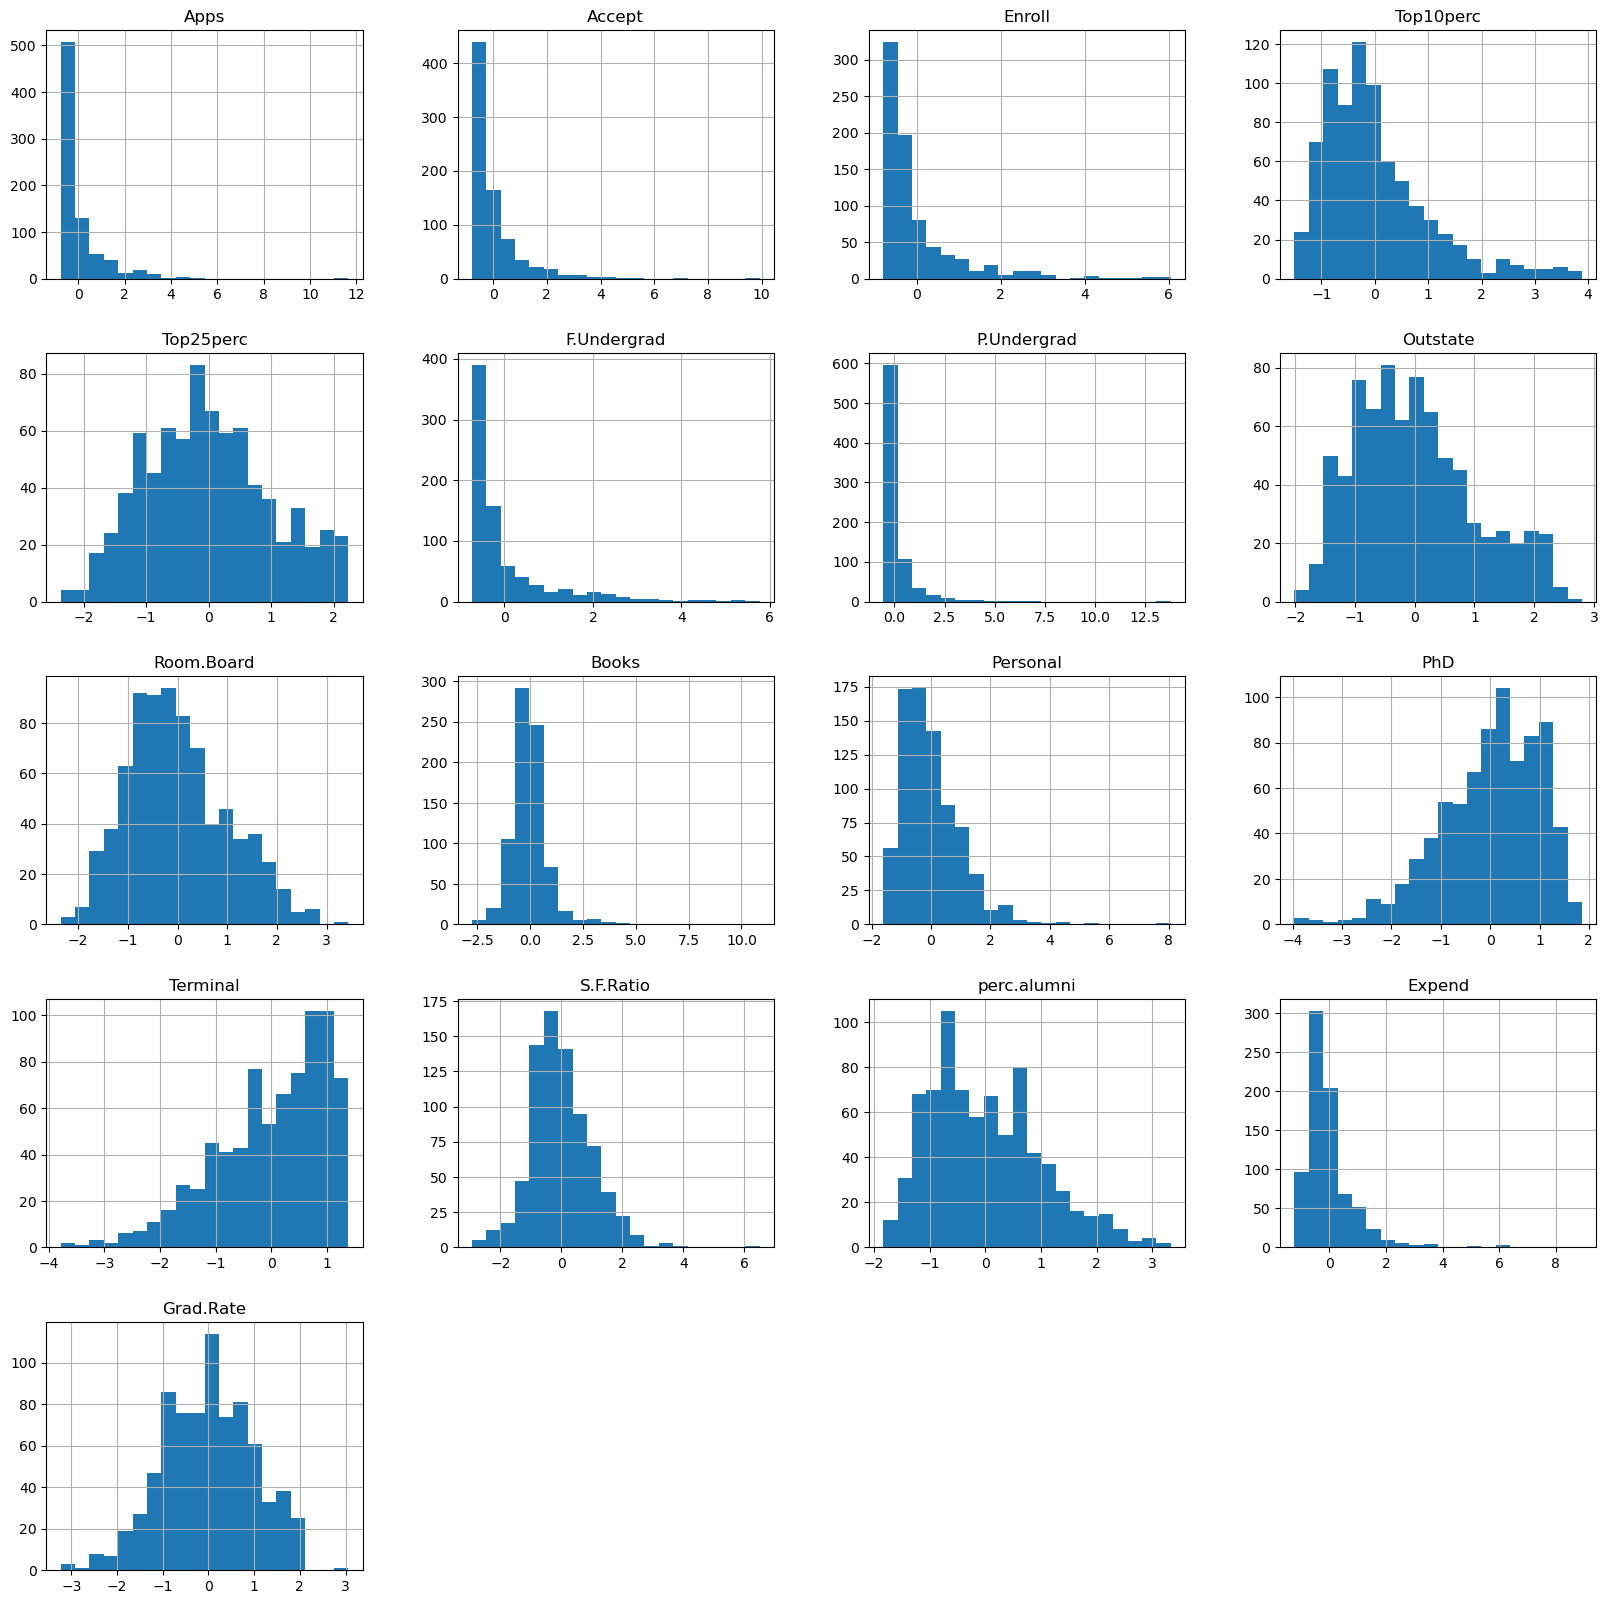

In [22]:
df_filter_normalized.hist(figsize=(20, 20), bins=20);

In [23]:
np.max(df_filter_normalized)

/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


Apps           11.658671
Accept          9.924816
Enroll          6.043678
Top10perc       3.882319
Top25perc       2.233391
F.Undergrad     5.764674
P.Undergrad    13.789921
Outstate        2.800531
Room.Board      3.436593
Books          10.852297
Personal        8.068387
PhD             1.859323
Terminal        1.379560
S.F.Ratio       6.499390
perc.alumni     3.331452
Expend          8.924721
Grad.Rate       3.060392
dtype: float64

In [24]:
np.min(df_filter_normalized)

/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


Apps          -0.755134
Accept        -0.794764
Enroll        -0.802273
Top10perc     -1.506526
Top25perc     -2.364419
F.Undergrad   -0.734617
P.Undergrad   -0.561502
Outstate      -2.014878
Room.Board    -2.351778
Books         -2.747779
Personal      -1.611860
PhD           -3.962596
Terminal      -3.785982
S.F.Ratio     -2.929799
perc.alumni   -1.836580
Expend        -1.240641
Grad.Rate     -3.230876
dtype: float64

In [25]:
# After Normalization the difference in features relative x-axis amplitude is reduced

In [26]:
# Let's reassess the labels output of the normalized model:

Km2 = kmeans.fit(df_filter_normalized)
private_Publ_labels2 = kmeans.predict(df_filter_normalized) # Get the Labels

clusters_public_private2 = kmeans.cluster_centers_
clusters_public_private2.shape

(2, 17)

In [27]:
get_classification(df['Private'],private_Publ_labels2)



1- report
              precision    recall  f1-score   support

           0       0.30      0.69      0.42       212
           1       0.77      0.40      0.53       565

    accuracy                           0.48       777
   macro avg       0.54      0.54      0.47       777
weighted avg       0.64      0.48      0.50       777

2- f1_score
0.5257009345794393
3- recall
0.39823008849557523





### REMINDER : NO Normalization
1- report
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
    
   macro avg                          0.74      0.64      0.66       777
   
weighted avg       0.76      0.78      0.75       777

2- f1_score
0.8606158833063209


3- recall
0.9398230088495575

In [ ]:
# The score after normalization is worst than before.
# the f1-score is rather similar for cluster 0 ( public schools)
# but it has decreased from 0.86 down to 0.53 for cluster 1 (private schools)

# My take:
# Private school have the tendancy to recruit amount top.percentil
# But After NORMALIZATION, the features like Top10.percentil or Top25.percentil
# are less significant proportionally to the other features.
# Since these particular features are mostly what could distinguishe the private school from public school cluster
# the accurancy is reduce from 0.78 down to 0.48 after normalization



In [28]:
# silhouette

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def get_silhouette(df,cluster_labels):

    X = df
    #range_n_clusters = [2, 3, 4, 5, 6] # Potential K values
    range_n_clusters = [2]

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        #fig, (ax1, ax2) = plt.subplots(1, 2)
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the cluster with n_clusters value and a random generator

        
        
        # seed of 10 for reproducibility.
    #    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    #    cluster_labels = clusterer.fit_predict(X)
        cluster_labels = cluster_labels
        
        
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample( sample : points belonging to a cluster)
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10 # esthetic : so that the 1st silhouette doesnt touch the x-axis
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0] # Nbre of point with same Label
            y_upper = y_lower + size_cluster_i
            print('Size cluster_',i,': ', size_cluster_i)

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed

        #colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        #ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                  #  c=colors, edgecolor='k')

        # Labeling the clusters
        #centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        #ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
        #            c="white", alpha=1, s=200, edgecolor='k')

        #for i, c in enumerate(centers):  # enumerate returns index, value at index
        #    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, # marker is what is indicated as label
        #                s=50, edgecolor='k')

        #ax2.set_title("The visualization of the clustered data.")
        #ax2.set_xlabel("Feature space for the 1st feature")
        #ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5599267817640777
Size cluster_ 0 :  108
Size cluster_ 1 :  669


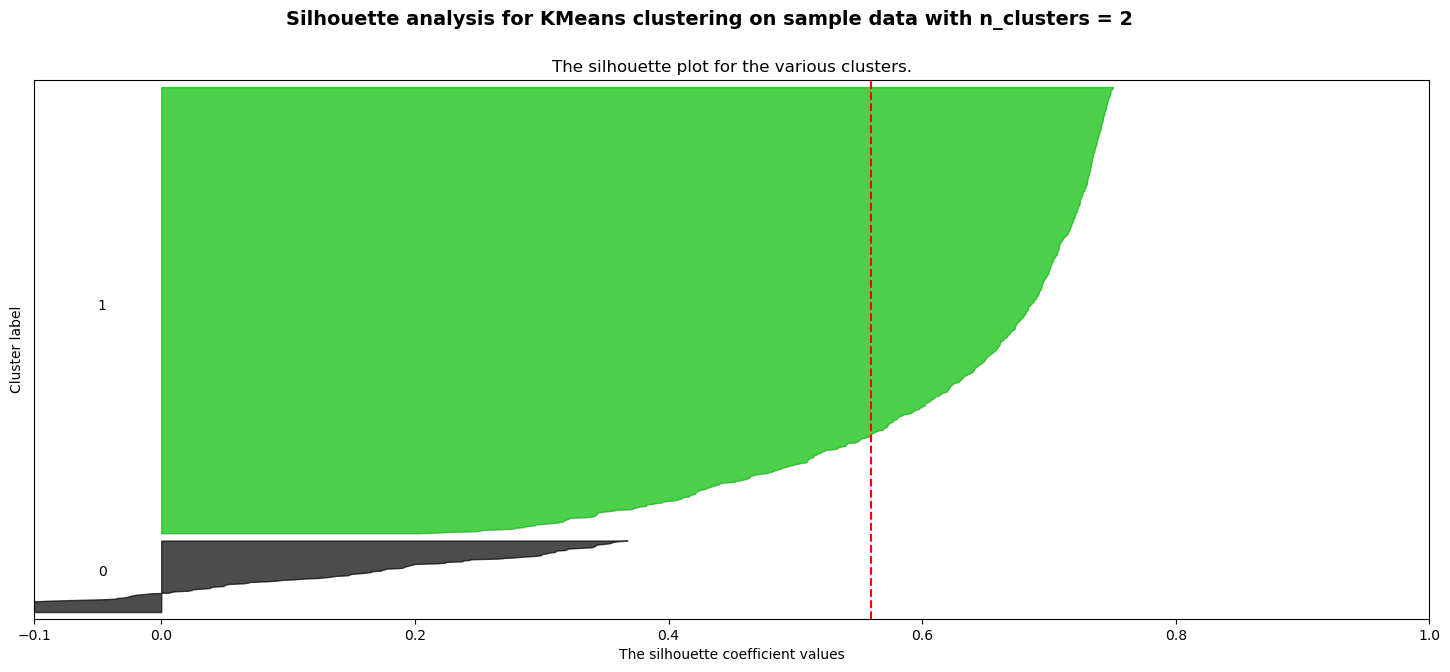

In [29]:
# Silhouette for NOT Normalized
get_silhouette(df_filter,private_Publ_labels)

For n_clusters = 2 The average silhouette_score is : 0.22854940273044855
Size cluster_ 0 :  486
Size cluster_ 1 :  291


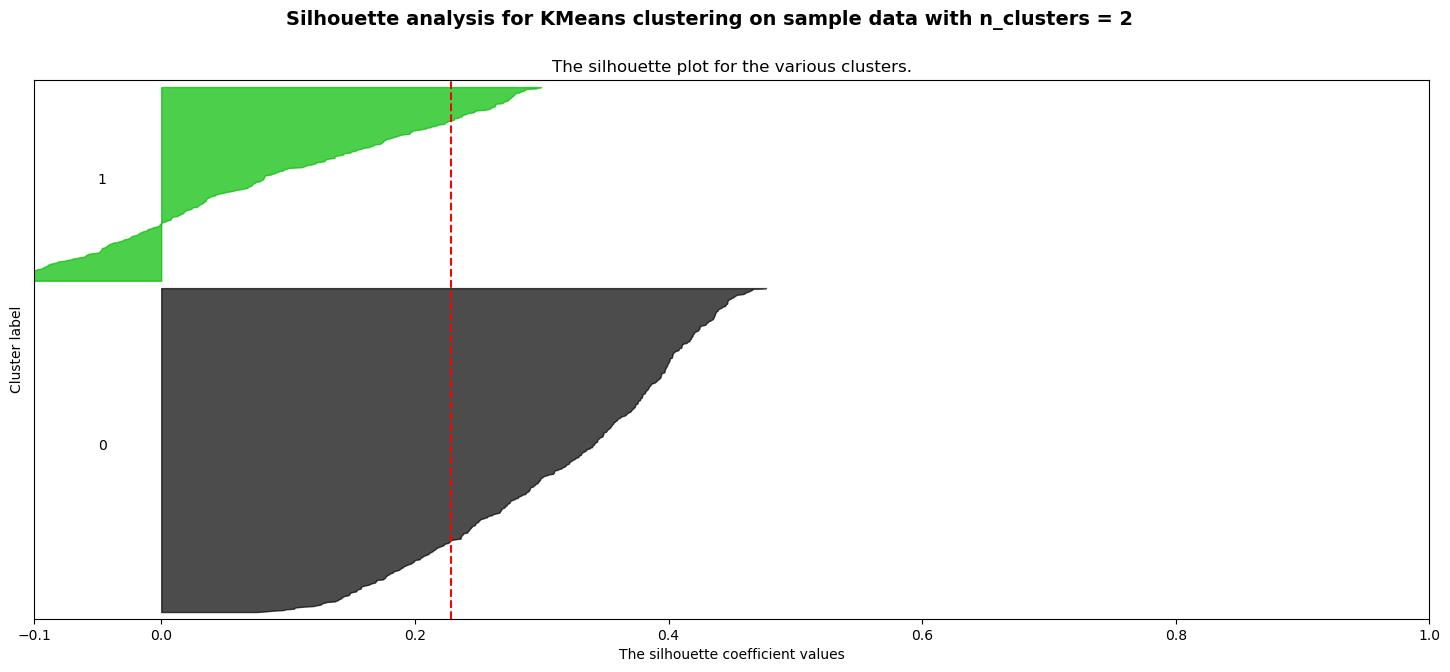

In [30]:
# Silhouette WHEN NORMALIZED
get_silhouette(df_filter_normalized, private_Publ_labels2)

SILHOUETTE DISTANCE:

    A[i] : Euclidian DISTANCE of points to each other inside the same cluster
    
    B[i] : average distance between a cluster points to another cluster points
        Can also be cluster centroid distance to another cluster points
        
**Ideally: a is small and b is big **
    
    S = (b-a)/ Max(b,a) 
    Good score S ~ 1 <=> S ~ b /b = 1 
    if a is big : Decision boundary
        S = 0
    if a is enormous:
        S= -a/a = -1 ( incorrect classification)
    

In [ ]:
# Silhouette evaluation:
#    near +1 indicate that the sample is far away from the neighboring clusters.
#    A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and
#    negative values indicate that those samples might have been assigned to the wrong cluster.

''' 
Observing the silhouette for n_clusters = 2
NORMALIZED
Size cluster_ 0 = 486  vs. True Public = 212     |. Diff = 274
Size cluster_ 1 = 291  vs. True Private = 565    |. Diff = 274

    Overall score n_cluster = 2 is  SCORE = 0.22

     for center=1: 
          we can see that the private school cluster
          has the smallest amount of labels ( according to its vertical height)
          the highest value in this cluster is ~ 0.3
          More than 80% of the score points are below 0.22
          Around 25% of the points score are <0 : Misclassified schools


     for center=0: 
          we can see that the public school cluster
          has the largest amount of labels ( according to its vertical height)
          the highest score value in this cluster is ~ 0.5
          At least 80% of the score points are beyond ~ 0.25


     Normalized silhouette: the score is rather low: 0.22
     Which means the distinction between the 2 clusters is not clear.
     The cluster centers are too close to each others (b distance )and they could actually share points since 
     a value is rather big in reference to b.
     Ex: in the cluster=1, the distance a ~= b or a > b
     resulting in misclassification
     
     
NOT normalized
Size cluster_ 0 :  108  vs. True Public = 212  |. Diff = 104 
Size cluster_ 1 :  669  vs. True Private = 565 |. Diff = 104
    
    Overall score n_cluster=2 is SCORE = 0.55
    
    for center=1:
          we can see that the private school cluster 1
          has the highest amount of labels ( according to its vertical height)
          the highest value in this cluster is ~ 0.75
          More than 80% of the score points are beyond 0.55
    for center=0: 
          we can see that the public school cluster
          has the smallest amount of labels ( according to its vertical height)
          the highest score value in this cluster is ~ 0.38
          At least 80% of the score points are beyond ~ 0.05
          About 25% of values are misclassified
          


In our particular case,
when not normalized, the silhouette score is better,
the classifications are more accurate,
the misclassifications are less
the difference in misclassification is 104 instead of 274 with normalization.

Having had  NORMALIZED, the features like Top10.percentil or Top25.percentil
seemed a bad idea as these features which differentiate private school,
are proportionally less significant after normalization than the other features.
'''

In [60]:
# Metrics evaluation

from sklearn import metrics
# 1- Rand index adjusted for chance: 
#     0.0 for random labeling and 
#     1.0 when the clusterings are identical (up to a permutation). 
#     bounded below by -0.5 for especially discordant clusterings.
#
#     ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)

# 2- V-measure:
#     This score is identical to normalized_mutual_info_score with the 'arithmetic' option for averaging
#     Score between 0.0 and 1.0. 
#     1.0 stands for perfectly complete labeling.
#
#     v = (1 + beta) * homogeneity * completeness / (beta * homogeneity + completeness)

# 3- mutual_info_score:
#     The Mutual Information is a measure of the similarity between two labels of the same data.
#
#     Mutual information, a non-negative value, measured in nats using the natural logarithm.


# 4 - ami_score:
#     Adjusted Mutual Information (AMI) is an adjustment of the Mutual Information (MI) score to account for chance.
#     The AMI returns a value of 1 when the two partitions are identical (ie perfectly matched). 
#     Random partitions (independent labellings) have an expected AMI around 0 on average hence can be negative.
#     The value is in adjusted nats (based on the natural logarithm).
#
#     AMI(U, V) = [MI(U, V) - E(MI(U, V))] / [avg(H(U), H(V)) - E(MI(U, V))]



def clustering_metrics(labels_true, labels_pred):
    score_funcs = [metrics.adjusted_rand_score, metrics.v_measure_score, metrics.mutual_info_score, metrics.adjusted_mutual_info_score]
    score_title = ['\n1- adjusted_rand_score: ', '2- v_measure_score: ', '3- mutual_info_score: ', '4- ami_score: ']
    for score in enumerate(score_funcs):
        print(score_title[score[0]] , score[1](labels_true, labels_pred))
        
        
print('Score when NOT Normalized: ')
clustering_metrics(df['Private'], private_Publ_labels)
print('\nScore when Normalized: ')
clustering_metrics(df['Private'], private_Publ_labels2)
          

Score when NOT Normalized: 

1- adjusted_rand_score:  0.22700271229120822
2- v_measure_score:  0.12383711448814684
3- mutual_info_score:  0.06125010517049831
4- ami_score:  0.12268826188214077

Score when Normalized: 

1- adjusted_rand_score:  -0.012097811710501172
2- v_measure_score:  0.005216049934234967
3- mutual_info_score:  0.0032532074279768286
4- ami_score:  0.004185681180379838


In [ ]:
# The overall score is better when not normalized.
# But even for that, the score is low in comparison of what a good score of 1 should be
# We can conclude when cluster k = 2 is not appropriated especially when normalized

In [ ]:
# 2. Knowing what you found in 2.1, find the best overall clustering with the k of your choice. 
# Make an argument and a visualization of the clusters 
# (with two relevant statistics) to demonstrate why you think your clustering is good.

In [ ]:
# Now let's search for a better K:

In [35]:
def get_silhouette_bis(df):

    X = df
    range_n_clusters = [2, 3, 4, 5, 6] # Potential K values


    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        #fig, (ax1, ax2) = plt.subplots(1, 2)
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the cluster with n_clusters value and a random generator

        
        
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
    
        
        
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample( sample : points belonging to a cluster)
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10 # esthetic : so that the 1st silhouette doesnt touch the x-axis
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0] # Nbre of point with same Label
            y_upper = y_lower + size_cluster_i
            print('Size cluster_',i,': ', size_cluster_i)

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.22854940273044855
Size cluster_ 0 :  486
Size cluster_ 1 :  291
For n_clusters = 3 The average silhouette_score is : 0.24214007629105047
Size cluster_ 0 :  438
Size cluster_ 1 :  93
Size cluster_ 2 :  246
For n_clusters = 4 The average silhouette_score is : 0.18216931420896404
Size cluster_ 0 :  336
Size cluster_ 1 :  94
Size cluster_ 2 :  270
Size cluster_ 3 :  77
For n_clusters = 5 The average silhouette_score is : 0.1786315973678927
Size cluster_ 0 :  265
Size cluster_ 1 :  77
Size cluster_ 2 :  258
Size cluster_ 3 :  62
Size cluster_ 4 :  115
For n_clusters = 6 The average silhouette_score is : 0.16712875331601548
Size cluster_ 0 :  129
Size cluster_ 1 :  77
Size cluster_ 2 :  218
Size cluster_ 3 :  66
Size cluster_ 4 :  259
Size cluster_ 5 :  28


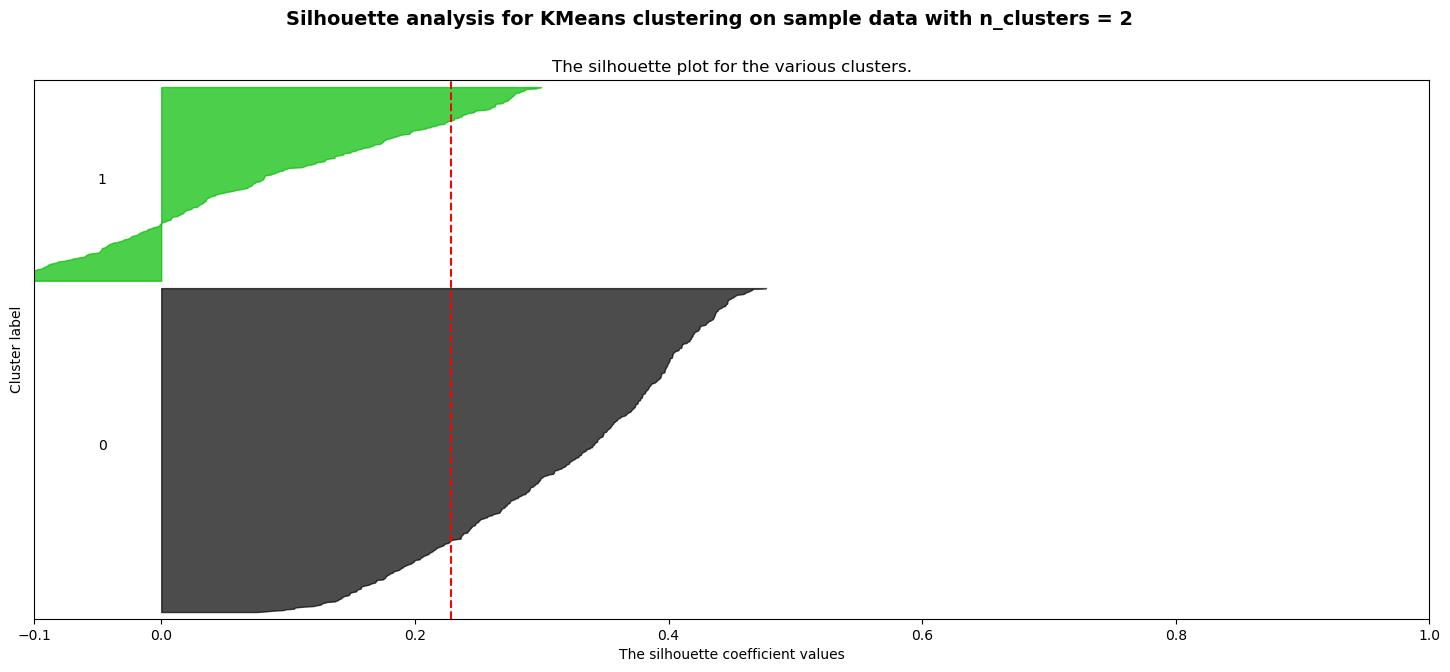

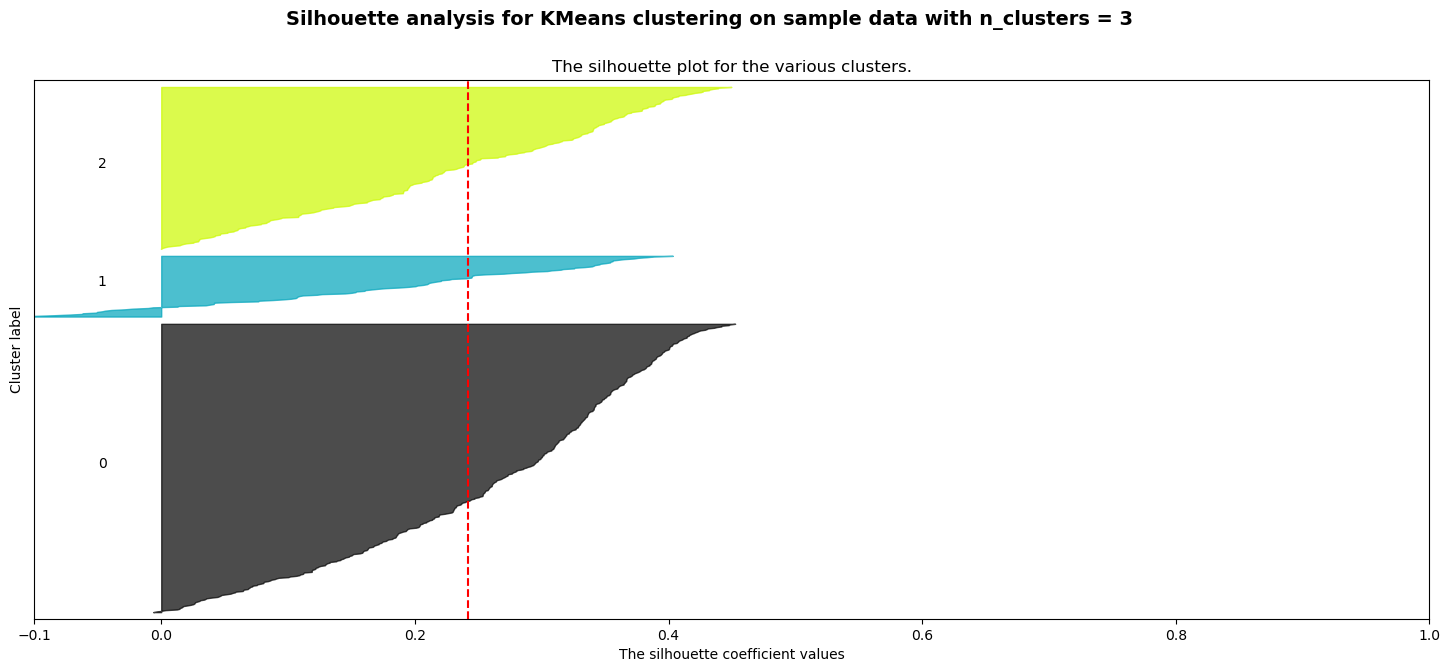

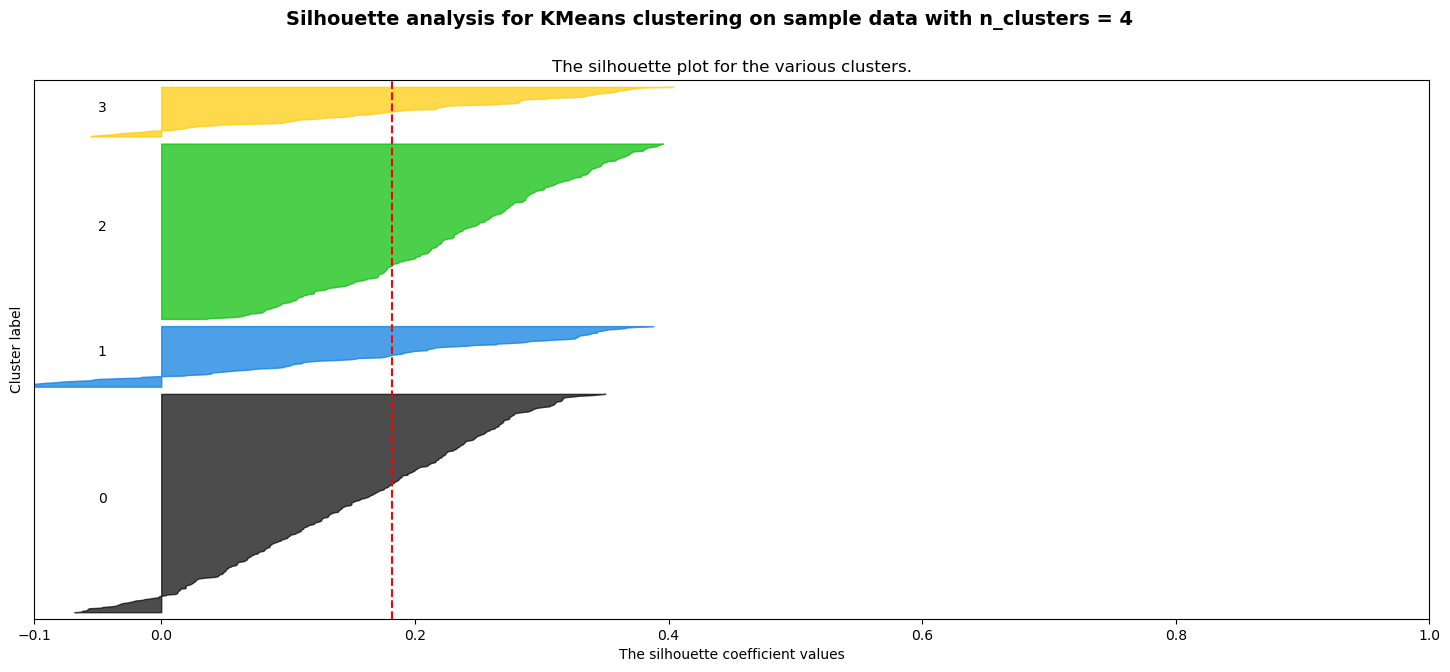

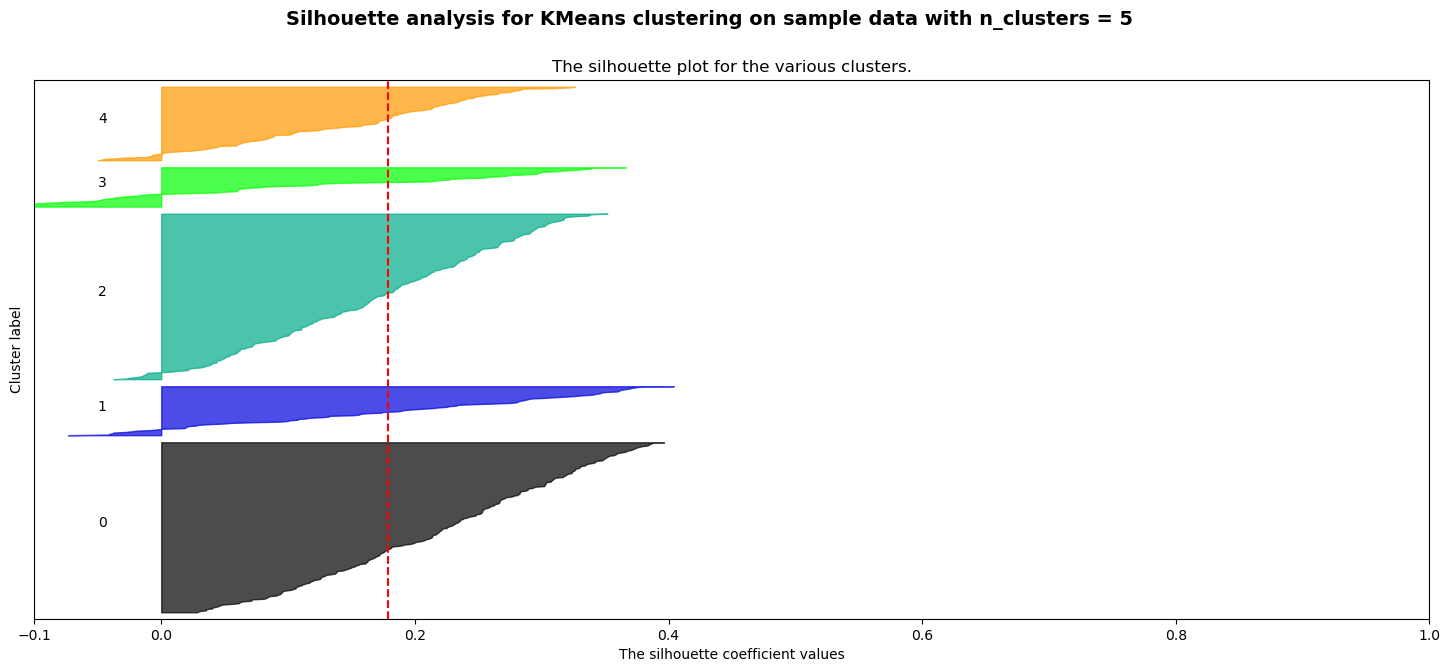

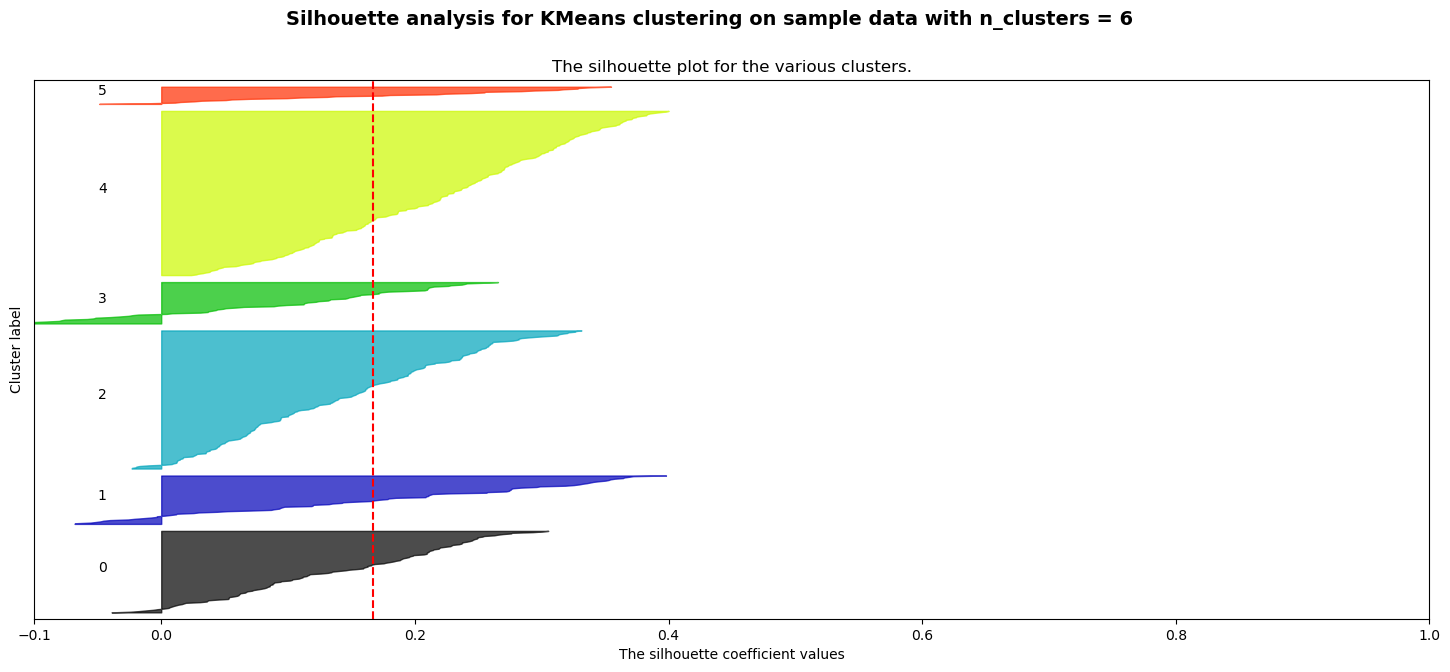

In [36]:
get_silhouette_bis(df_filter_normalized)

For n_clusters = 2 The average silhouette_score is : 0.5599267817640777
Size cluster_ 0 :  669
Size cluster_ 1 :  108
For n_clusters = 3 The average silhouette_score is : 0.4759356725934926
Size cluster_ 0 :  565
Size cluster_ 1 :  83
Size cluster_ 2 :  129
For n_clusters = 4 The average silhouette_score is : 0.38208020825048794
Size cluster_ 0 :  469
Size cluster_ 1 :  82
Size cluster_ 2 :  20
Size cluster_ 3 :  206
For n_clusters = 5 The average silhouette_score is : 0.3865165112704985
Size cluster_ 0 :  163
Size cluster_ 1 :  112
Size cluster_ 2 :  20
Size cluster_ 3 :  52
Size cluster_ 4 :  430
For n_clusters = 6 The average silhouette_score is : 0.3087745413686961
Size cluster_ 0 :  279
Size cluster_ 1 :  103
Size cluster_ 2 :  19
Size cluster_ 3 :  236
Size cluster_ 4 :  30
Size cluster_ 5 :  110


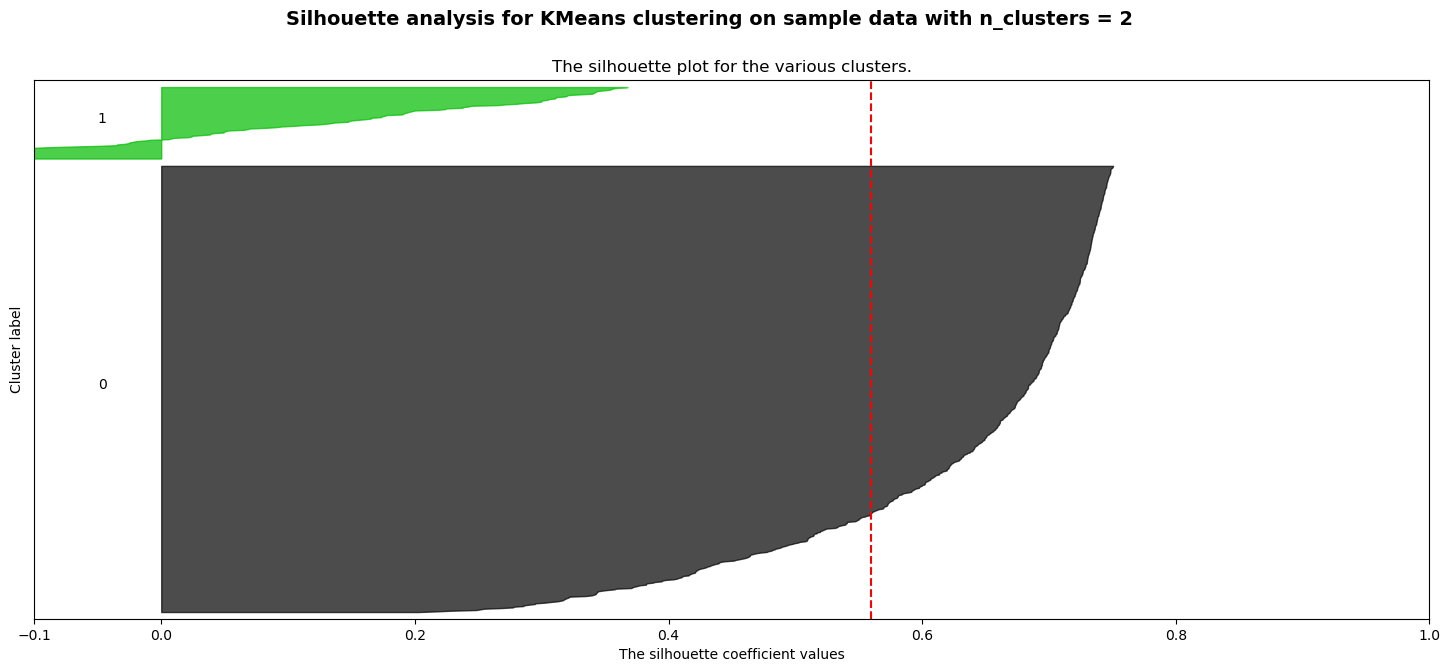

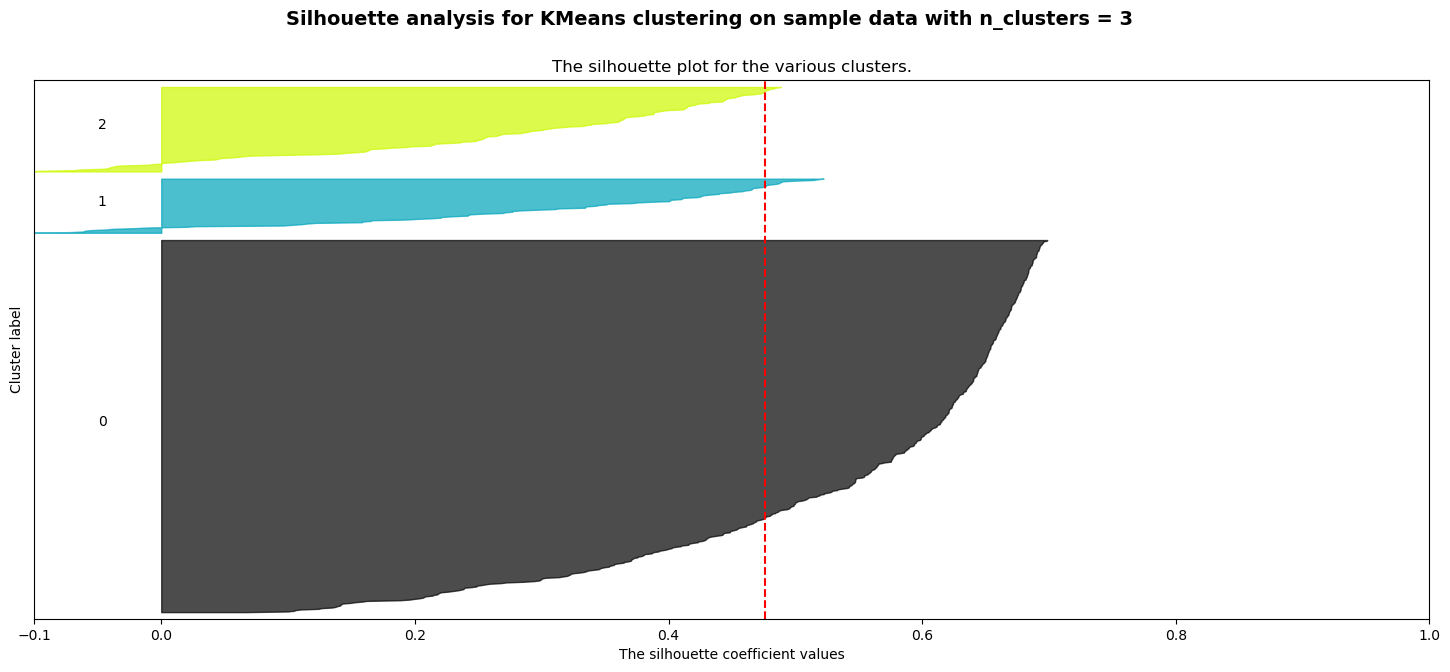

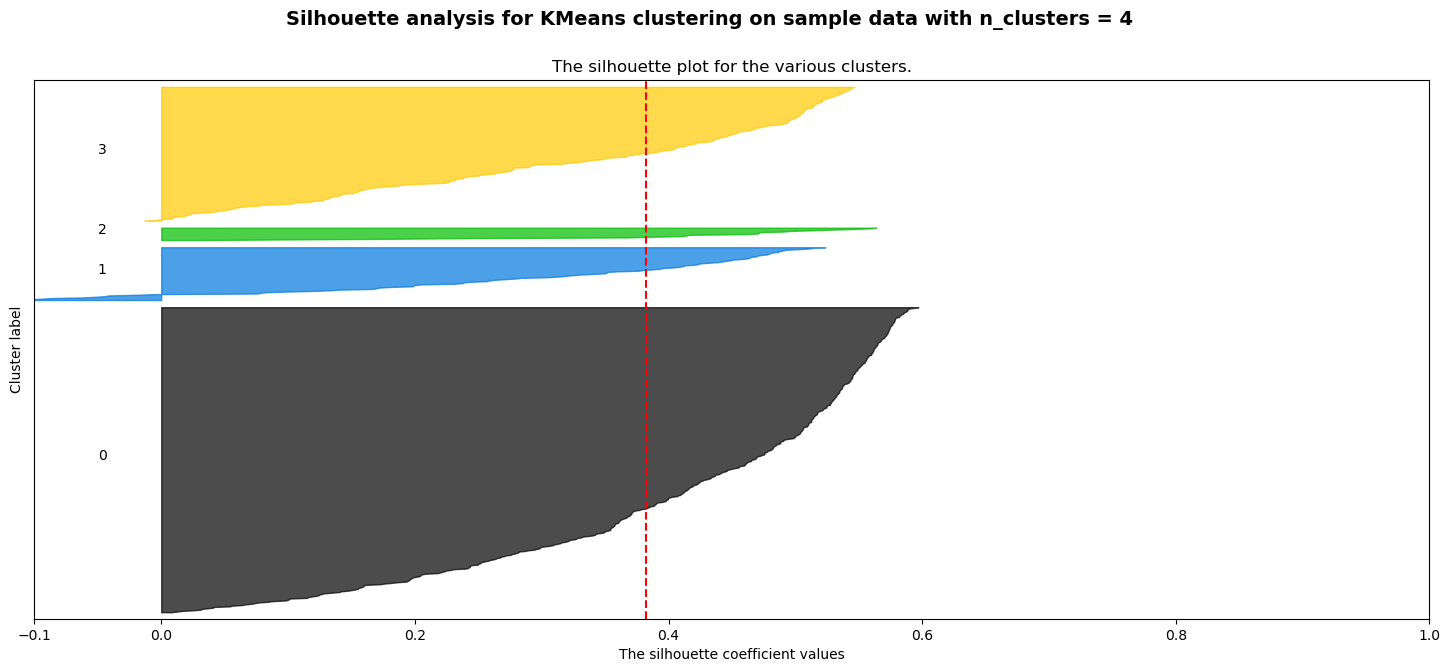

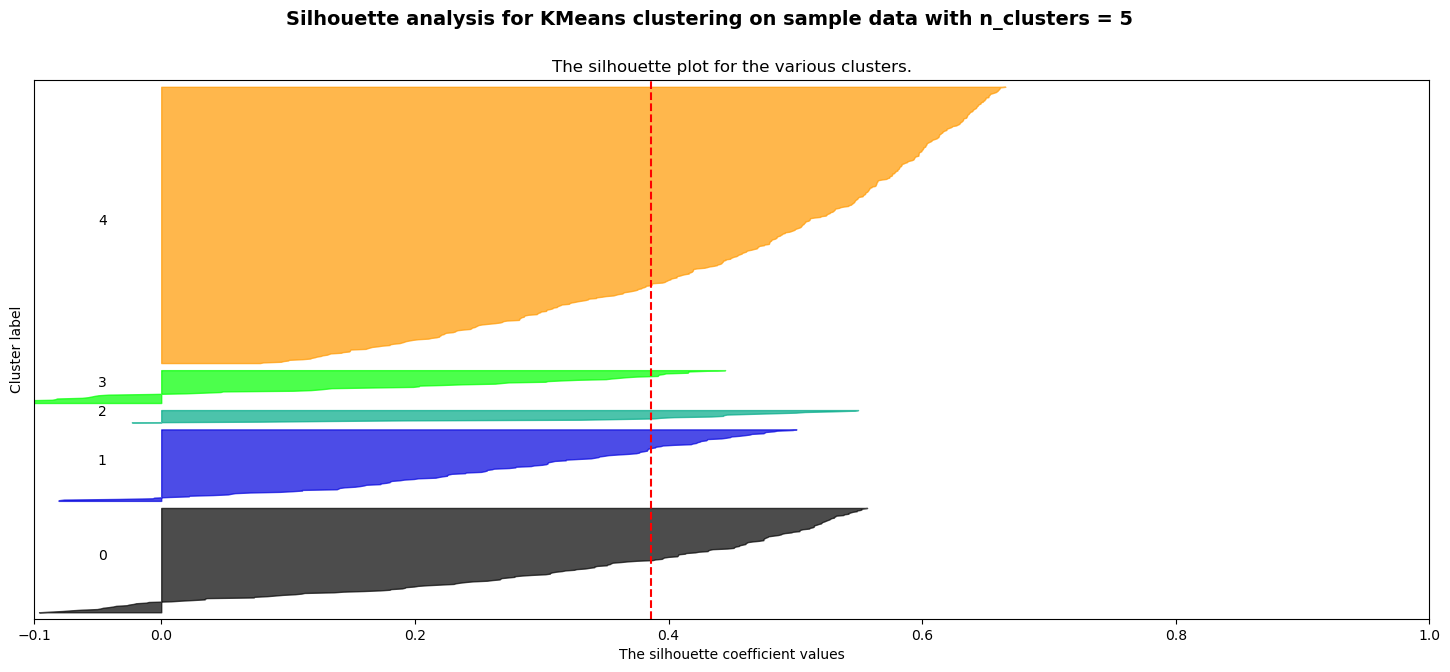

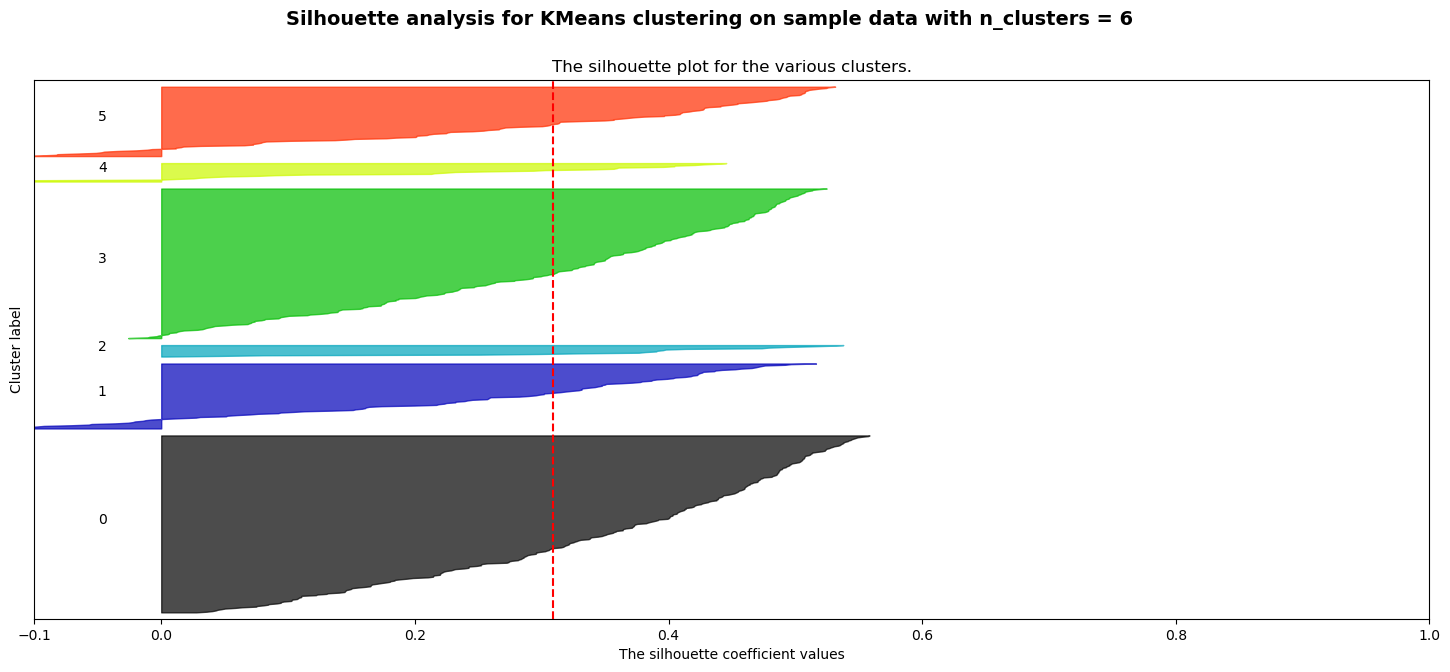

In [38]:
get_silhouette_bis(df_filter)

In [ ]:
# CONCLUSION:
'''
if the features are normalized, it would be best to take
k = 3 <=> Silhouette Score = 0.24

if the features are not normalized, it woud be best to take
k = 2 <=> Silhouette Score = 0.55

Overall the best score is k=2 when not normalized
'''